In [1]:
import cv2
from ultralytics import YOLO
import os 


In [2]:
model = YOLO("yolo11n.pt")
video_path = "../ungitable/2cKVta2pHP2Eq2ts.mp4"

print(os.path.exists(video_path))   

True


In [3]:
import goodclips.utils as utils
foo = utils.gen_deepsort_output(video_file=video_path)


0: 384x640 10 persons, 30.2ms
Speed: 1.2ms preprocess, 30.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 26.6ms
Speed: 0.7ms preprocess, 26.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 30.7ms
Speed: 0.8ms preprocess, 30.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 25.0ms
Speed: 0.8ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 27.5ms
Speed: 0.8ms preprocess, 27.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 26.0ms
Speed: 0.9ms preprocess, 26.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 28.1ms
Speed: 0.8ms preprocess, 28.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 26.8ms
Speed: 1.0ms preprocess, 26.8ms inference, 0.6ms postprocess per image at

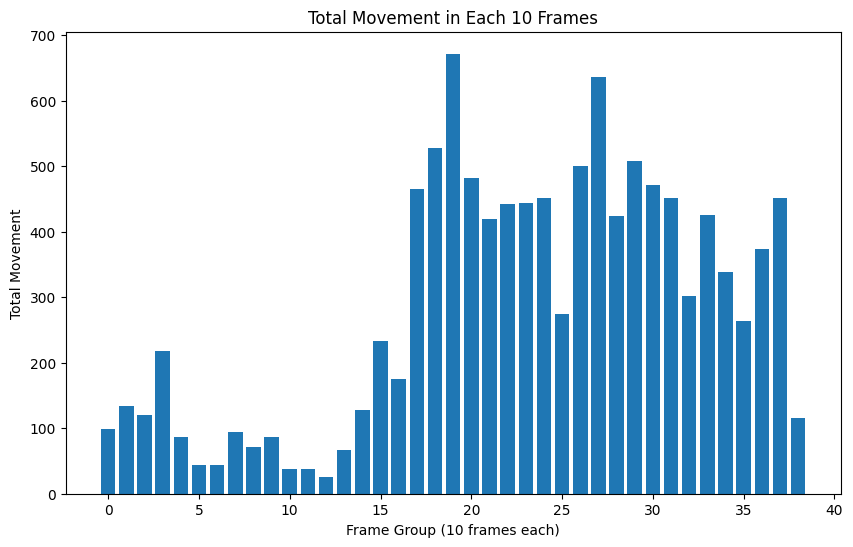

In [4]:
import matplotlib.pyplot as plt


# Measure movement for each frame
movements = [utils.measure_movement(foo,i) for i in range(1,len(foo.frames))]

frames_interval=30
# Calculate the sum of movements for each 10 frames
movement_sums = [sum(movements[i:i+frames_interval]) for i in range(0, len(movements), frames_interval)]


# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(movement_sums)), movement_sums)
plt.xlabel('Frame Group (10 frames each)')
plt.ylabel('Total Movement')
plt.title('Total Movement in Each 10 Frames')
plt.show()
